In [1]:

import numpy as np
import os 
from pathlib import Path
from keras.preprocessing import image

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [9]:

p = Path("./Images/images")

dirs = p.glob("*")

labels_dict = {"cat":0,"dog":1,"horse":2,"human":3}

image_data = []
labels = []

for folder_dir in dirs:
    #print(folder_name)
    label = str(folder_dir).split("\\")[-1][:-1]
    
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [11]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape,labels.shape)

(1616, 32, 32, 3) (1616,)


In [17]:
# import random

# combined = list(zip(image_data,labels))
# random.shuffle(combined)

# #Unzip
# image_data[:],labels[:] = zip(*combined)

In [19]:
from matplotlib import pyplot as plt

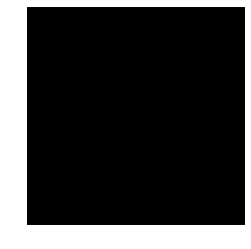

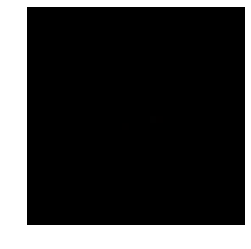

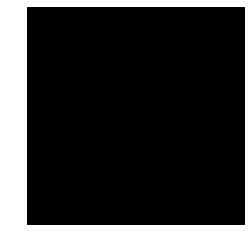

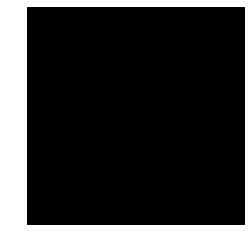

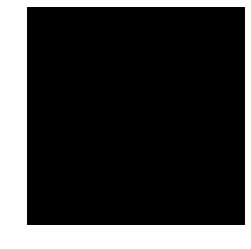

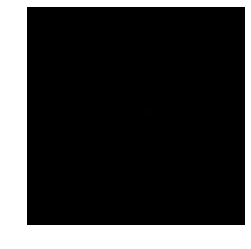

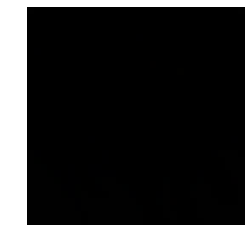

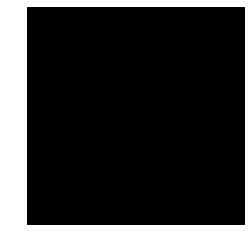

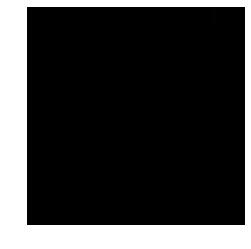

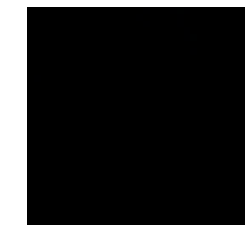

In [20]:
def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 

for i in range(10):
    drawImg(image_data[i])

In [24]:
M = image_data.shape[0] 
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(1616, 3072)
(1616,)


In [25]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [21]:

from sklearn import svm

In [22]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)

In [26]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.3533415841584158